In [1]:
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

import os

import matplotlib.pyplot as plt  # type: ignore
import subprocess

import rasterio
from rasterio.plot import show
from rasterstats import zonal_stats
from rasterio.warp import calculate_default_transform, reproject, Resampling

%matplotlib inline

In [ ]:
# demo in EPSG:3301
zonal_stats("../hydrological/catchments/porijogi_catchment/porijõgi_catchment.shp",
            "../dem/srtm/m30_extracted_eesti/Estonia_without_lakes_qgis.tif",
            stats="min max mean range median std",
            geojson_out=True)

In [ ]:
import os

the_path = r'C:\dev\05_geodata\soil\soilgrids_download'

list_of_soilgrids_soc_and_bd_for_fun = [
    'soil250_grid_bulkdens_sd1.tif',
    'soil250_grid_bulkdens_sd2.tif',
    'soil250_grid_bulkdens_sd3.tif',
    'soil250_grid_bulkdens_sd4.tif',
    'soil250_grid_bulkdens_sd5.tif',
    'soil250_grid_bulkdens_sd6.tif',
    'soil250_grid_bulkdens_sd7.tif',
    'soil250_grid_clay_sd1.tif',
    'soil250_grid_clay_sd2.tif',
    'soil250_grid_clay_sd3.tif',
    'soil250_grid_clay_sd4.tif',
    'soil250_grid_clay_sd5.tif',
    'soil250_grid_clay_sd6.tif',
    'soil250_grid_clay_sd7.tif',
    'soil250_grid_coarsefrag_sd1.tif',
    'soil250_grid_coarsefrag_sd2.tif',
    'soil250_grid_coarsefrag_sd3.tif',
    'soil250_grid_coarsefrag_sd4.tif',
    'soil250_grid_coarsefrag_sd5.tif',
    'soil250_grid_coarsefrag_sd6.tif',
    'soil250_grid_coarsefrag_sd7.tif',
    'soil250_grid_sand_sd1.tif',
    'soil250_grid_sand_sd2.tif',
    'soil250_grid_sand_sd3.tif',
    'soil250_grid_sand_sd4.tif',
    'soil250_grid_sand_sd5.tif',
    'soil250_grid_sand_sd6.tif',
    'soil250_grid_sand_sd7.tif',
    'soil250_grid_silt_sd1.tif',
    'soil250_grid_silt_sd2.tif',
    'soil250_grid_silt_sd3.tif',
    'soil250_grid_silt_sd4.tif',
    'soil250_grid_silt_sd5.tif',
    'soil250_grid_silt_sd6.tif',
    'soil250_grid_silt_sd7.tif',
    'soil250_grid_soc_frag_g_sd1.tif',
    'soil250_grid_soc_frag_g_sd2.tif',
    'soil250_grid_soc_frag_g_sd3.tif',
    'soil250_grid_soc_frag_g_sd4.tif',
    'soil250_grid_soc_frag_g_sd5.tif',
    'soil250_grid_soc_frag_g_sd6.tif',
    'soil250_grid_soc_frag_g_sd7.tif',
    'soil250_grid_soc_sd1.tif',
    'soil250_grid_soc_sd2.tif',
    'soil250_grid_soc_sd3.tif',
    'soil250_grid_soc_sd4.tif',
    'soil250_grid_soc_sd5.tif',
    'soil250_grid_soc_sd6.tif'
]

known_depths = {
    '1': 0,
    '2': 5,
    '3': 15,
    '4': 30,
    '5': 60,
    '6': 100,
    '7': 200
}

from rasterio.warp import calculate_default_transform, reproject, Resampling

dst_crs = 'EPSG:3301'

for tif_name in list_of_soilgrids_soc_and_bd_for_fun:
    full_src = os.path.join(the_path, tif_name)
    
    with rasterio.open(full_src) as src:
        transform, width, height = calculate_default_transform(
            src.crs, dst_crs, src.width, src.height, *src.bounds)
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': dst_crs,
            'transform': transform,
            'width': width,
            'height': height
        })
        
        outname = tif_name.replace(".tif", "_3301.tif")
        full_out = os.path.join(the_path, outname)

        with rasterio.open(full_out, 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rasterio.band(src, i),
                    destination=rasterio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest)

In [ ]:
tif_src = rasterio.open(r"../dem/srtm/m30_extracted_eesti/Estonia_without_lakes_qgis.tif")
# rasterio.plot.show()
show(tif_src)

In [ ]:
for tif_name in list_of_soilgrids_soc_and_bd_for_fun:
    full_src = os.path.join(the_path, tif_name.replace(".tif", "_3301.tif"))
    data_src = rasterio.open(full_src)
    display(data_src.crs)
    display(data_src.bounds)
    # show(tif_src)
    result = zonal_stats(r"C:\dev\05_geodata\hydrological\catchments\porijogi_catchment\porijõgi_catchment.shp", full_src, stats="min max mean range median std")
    display(result)

In [ ]:
path = r"E:\GEODATA\soil\eu_soil_hydrogrids\EU_SoilHydroGrids_250m_2017Feb08"

grid_cells = {}

files = []
folders = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for folder in d:
        folders.append(folder)
        
        for r1, d1, f1 in os.walk(os.path.join(path, folder)):
        
            for file in f1:
                if f"FC_M_sl1_{folder}.tif" in file:
                    files.append(os.path.join(r1, file))
                    data_src = rasterio.open(os.path.join(r1, file))
                    srs = data_src.crs
                    bounds = data_src.bounds
                    sub_obj = {
                        'grid_id': folder,
                        'srs': srs,
                        'bounds': bounds
                    }
                    grid_cells.update({ folder: sub_obj})
                    

for folder in folders:
    print(folder)

for file in files:
    print(file)

display(grid_cells)

In [ ]:
import fiona
from shapely.geometry import box, Polygon, shape, mapping
from collections import OrderedDict

schema = {
    "geometry": "Polygon",
    "properties": OrderedDict([
        ("grid_id", "str:200"),
    ])
}

def make_poly_from_bounds(bounds):
    # (minx, miny, maxx, maxy) or a Polygon instance
    bbox = box(bounds.left, bounds.bottom, bounds.right, bounds.top)
    return bbox

def make_feature_from_dict(grid_obj):
    return {
        "geometry": mapping(make_poly_from_bounds(grid_obj.get('bounds'))),
        "properties": {"grid_id": grid_obj.get('grid_id')}
    }
    
features = []

for obj in grid_cells.values():
    # display(obj)
    feat = make_feature_from_dict(obj)
    features.append(feat)

crs_wkt = data_src.crs.wkt

with fiona.open(r"E:\GEODATA\soil\eu_soil_hydrogrids\EU_SoilHydroGrids_250m_2017Feb08\grid_cells.shp", "w", driver="ESRI Shapefile", schema=schema, crs_wkt=crs_wkt) as collection:
    collection.writerecords(features)
    print(len(collection))
    collection.flush()

In [ ]:
data_src.crs.wkt

In [ ]:
features

In [ ]:


path_eesti_250m = r"C:\dev\05_geodata\soil\Estonia_EU_Hydrosoilgrids\Estonia_250m"

for r, d, f in os.walk(path_eesti_250m):
    for folder in d:
        for n in range(1,8):
            try:
                # We handle the connections with "with"
                with rasterio.open(os.path.join(r, folder, f"FC_M_sl{n}_{folder}.tif")) as src:
                    FC = src.read(1, masked=True)
                    nodataval = src.nodata

                with rasterio.open(os.path.join(r, folder, f"WP_M_sl{n}_{folder}.tif")) as src:
                    WP = src.read(1, masked=True)

                # Allow division by zero
                np.seterr(divide='ignore', invalid='ignore')

                # Calculate NDVI
                AWC = FC.astype(np.uint8) - WP.astype(np.uint8)
                
                # write_out_awc_raster(folder, n)
                # Define spatial characteristics of output object (basically they are analog to the input)
                kwargs = src.meta

                # Update kwargs (change in data type)
                kwargs.update(dtype=rasterio.uint8, count = 1, nodata = nodataval, masked = True)

                # Let's see what is in there
                print(kwargs)

                with rasterio.open(os.path.join(r, folder, f"AWC_M_sl{n}_{folder}.tif"), 'w', **kwargs) as dst:
                    dst.write_band(1, AWC.astype(rasterio.uint8))
                print(subprocess.check_output("gdalinfo " + os.path.join(r, folder, f"AWC_M_sl{n}_{folder}.tif"), shell=True))
                        
            except Exception as ex:
                print(ex)


## Now loading the soil polygons

- actually, load the big soil shp, only keep some columns and write out as shp again
- then run the rasterstats with keeping the geojson true and orig_fid attribute in particular
- then build a dataframe out of it and start developing the magic for the different layer aggregations
- once the AWC is mean per SOL_N layers and depth based on the original measured AWC EU hydrogrid depths join this AWC back to the main soil db (and basically only overwrite the SOL_AWC_1-4)

In [ ]:
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

import fiona  # type: ignore
from fiona.crs import from_epsg # type: ignore
import geopandas as gpd  # type: ignore

eesti_soil_red1_redo_awc = gpd.read_file("SWAT_soilmap_work/eesti_soil_red1_texture_fix_geo_drain_soc_bd_ksat_awc.shp", encoding='utf-8')

columns_to_keep = [ "orig_fid",
                    "nlayers",
                    "SOL_ZMX",
                    "SOL_Z1",
                    "SOL_Z2",
                    "SOL_Z3",
                    "SOL_Z4",
                    "SOL_AWC1",
                    "SOL_AWC2",
                    "SOL_AWC3",
                    "SOL_AWC4",
                    "geometry"]

eesti_soil_red1_redo_awc_short = eesti_soil_red1_redo_awc[columns_to_keep].copy()
del(eesti_soil_red1_redo_awc)

eesti_soil_red1_redo_awc_short.to_file('eesti_soil_red1_texture_fix_geo_redo_awc_tmp.shp', encoding='utf-8')



In [ ]:
eesti_soil_red1_redo_awc_short

{'init': 'epsg:3301'}

{'properties': OrderedDict([('orig_fid', 'int:18'),
              ('nlayers', 'int:18'),
              ('SOL_ZMX', 'int:18'),
              ('SOL_Z1', 'int:18'),
              ('SOL_Z2', 'int:18'),
              ('SOL_Z3', 'int:18'),
              ('SOL_Z4', 'int:18'),
              ('SOL_AWC1', 'float:24.15'),
              ('SOL_AWC2', 'float:24.15'),
              ('SOL_AWC3', 'float:24.15'),
              ('SOL_AWC4', 'float:24.15')]),
 'geometry': 'Polygon'}

745442
745442
745442
745442
745442
745442
745442


orig_fid      0
nlayers       0
SOL_ZMX       0
SOL_Z1        0
SOL_Z2        0
SOL_Z3        0
SOL_Z4        0
SOL_AWC1      0
SOL_AWC2      0
SOL_AWC3      0
SOL_AWC4      0
mean        470
median      470
std         470
geometry      0
dtype: int64

,orig_fid,nlayers,SOL_ZMX,SOL_Z1,SOL_Z2,SOL_Z3,SOL_Z4,SOL_AWC1,SOL_AWC2,SOL_AWC3,SOL_AWC4,mean,median,std,geometry
607225,607079,1,1000,1000,0,0,0,0.200,0.000,0.0,0.0,21.000000,21.0,0.000000,"POLYGON ((637874.4099999964 6392860.940000001,..."
541983,534252,1,1400,1400,0,0,0,0.150,0.000,0.0,0.0,20.538462,21.0,0.634324,"POLYGON ((597519.6499999985 6433499.109999999,..."
642941,642795,1,1000,1000,0,0,0,0.200,0.000,0.0,0.0,20.500000,20.5,0.500000,"POLYGON ((561249.4399999976 6471861.84, 561246..."
520272,512541,1,1000,1000,0,0,0,0.150,0.000,0.0,0.0,20.000000,20.0,0.000000,"POLYGON ((663989.1437999979 6439156.985599998,..."
226307,226307,2,1000,800,200,0,0,0.200,0.200,0.0,0.0,20.333333,20.0,0.471405,"POLYGON ((531250.5900000036 6573537.829999998,..."
171433,171433,2,1000,750,250,0,0,0.200,0.200,0.0,0.0,20.750000,21.0,0.622495,"POLYGON ((596181.7400000021 6494125.98, 596164..."
526939,519208,1,1000,1000,0,0,0,0.150,0.000,0.0,0.0,19.000000,19.0,0.000000,"POLYGON ((561903.9200000018 6457433.18, 561899..."
118172,118172,1,1000,1000,0,0,0,0.316,0.000,0.0,0.0,21.000000,21.0,0.000000,"POLYGON ((699921.1899999976 6389628.609999999,..."
141554,141423,1,1000,1000,0,0,0,0.150,0.000,0.0,0.0,19.857143,20.0,0.349927,"POLYGON ((492486.7599999979 6500158.149999999,..."
371065,371058,2,1000,500,500,0,0,0.316,0.316,0.0,0.0,20.666667,21.0,0.666667,"POLYGON ((615619.5099999979 6591471.059999999,..."


orig_fid      int64
nlayers       int64
SOL_ZMX       int64
SOL_Z1        int64
SOL_Z2        int64
SOL_Z3        int64
SOL_Z4        int64
SOL_AWC1    float64
SOL_AWC2    float64
SOL_AWC3    float64
SOL_AWC4    float64
mean        float64
median      float64
std         float64
geometry     object
dtype: object

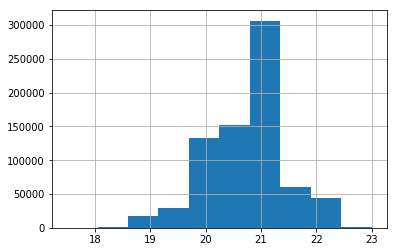

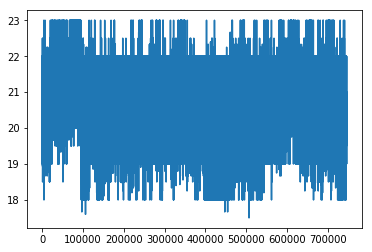

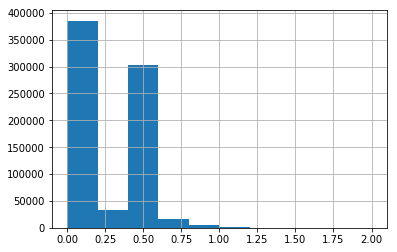

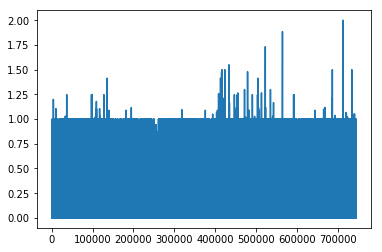

C:\dev\conda3\envs\geopython-environment\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


orig_fid      0
nlayers       0
SOL_ZMX       0
SOL_Z1        0
SOL_Z2        0
SOL_Z3        0
SOL_Z4        0
SOL_AWC1      0
SOL_AWC2      0
SOL_AWC3      0
SOL_AWC4      0
mean        470
median      470
std         470
geometry      0
dtype: int64

,orig_fid,nlayers,SOL_ZMX,SOL_Z1,SOL_Z2,SOL_Z3,SOL_Z4,SOL_AWC1,SOL_AWC2,SOL_AWC3,SOL_AWC4,mean,median,std,geometry
364455,364448,1,1000,1000,0,0,0,0.200,0.000,0.0,0.0,21.000000,21.0,0.000000,"POLYGON ((615569.1300000027 6518956.52, 615574..."
587566,587555,1,1000,1000,0,0,0,0.200,0.000,0.0,0.0,20.666667,21.0,0.471405,"POLYGON ((684682.5099999979 6445238.449999999,..."
26679,26679,1,1000,1000,0,0,0,0.200,0.000,0.0,0.0,21.250000,21.0,0.433013,"POLYGON ((634195.4799999967 6443386.829999998,..."
322909,322908,1,1000,1000,0,0,0,0.316,0.000,0.0,0.0,21.000000,21.0,0.000000,"POLYGON ((634847.7594999969 6445613.449999999,..."
612972,612826,2,1000,500,500,0,0,0.200,0.316,0.0,0.0,20.500000,20.5,0.500000,"POLYGON ((664218.4600000009 6437027.510000002,..."
492066,503874,1,1000,1000,0,0,0,0.200,0.000,0.0,0.0,21.000000,21.0,0.000000,"POLYGON ((662356.6799999997 6431930.449999999,..."
692915,692758,2,1000,800,200,0,0,0.500,0.200,0.0,0.0,20.000000,20.0,0.000000,"POLYGON ((492034.9699999988 6548437.75, 492028..."
464959,476767,1,1000,1000,0,0,0,0.150,0.000,0.0,0.0,20.500000,20.5,0.500000,"POLYGON ((648417.549999997 6429201.25, 648420...."
688106,687949,1,1000,1000,0,0,0,0.500,0.000,0.0,0.0,21.000000,21.0,0.000000,"POLYGON ((659552.1099999994 6436374.18, 659548..."
691256,691099,2,1000,600,400,0,0,0.500,0.316,0.0,0.0,20.000000,20.0,0.000000,"POLYGON ((587337.9900000021 6431658.989999998,..."


orig_fid      int64
nlayers       int64
SOL_ZMX       int64
SOL_Z1        int64
SOL_Z2        int64
SOL_Z3        int64
SOL_Z4        int64
SOL_AWC1    float64
SOL_AWC2    float64
SOL_AWC3    float64
SOL_AWC4    float64
mean        float64
median      float64
std         float64
geometry     object
dtype: object

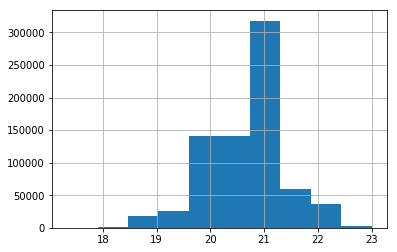

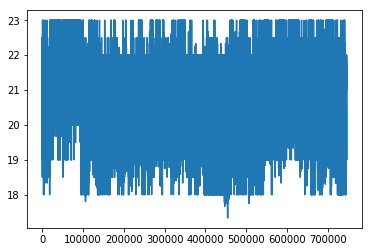

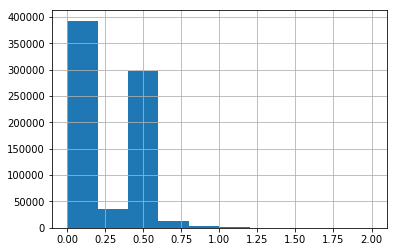

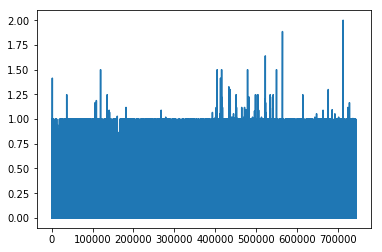

orig_fid      0
nlayers       0
SOL_ZMX       0
SOL_Z1        0
SOL_Z2        0
SOL_Z3        0
SOL_Z4        0
SOL_AWC1      0
SOL_AWC2      0
SOL_AWC3      0
SOL_AWC4      0
mean        470
median      470
std         470
geometry      0
dtype: int64

,orig_fid,nlayers,SOL_ZMX,SOL_Z1,SOL_Z2,SOL_Z3,SOL_Z4,SOL_AWC1,SOL_AWC2,SOL_AWC3,SOL_AWC4,mean,median,std,geometry
534360,526629,1,1000,1000,0,0,0,0.150,0.00,0.0,0.0,18.000000,18.0,0.000000,"POLYGON ((386751.2800000012 6433858.890000001,..."
124797,124797,1,1000,1000,0,0,0,0.500,0.00,0.0,0.0,19.500000,19.5,0.500000,"POLYGON ((705129.7599999979 6440252.41, 705125..."
61749,62194,1,1000,1000,0,0,0,0.200,0.00,0.0,0.0,20.000000,20.0,0.000000,"POLYGON ((697816.7299999967 6389010.800000001,..."
339613,339612,1,1000,1000,0,0,0,0.150,0.00,0.0,0.0,20.500000,20.5,0.500000,"POLYGON ((638729.4099999964 6428319.719999999,..."
244154,244142,1,1000,1000,0,0,0,0.200,0.00,0.0,0.0,19.000000,19.0,0.000000,"POLYGON ((645137.4399999976 6454119.32, 645136..."
98710,98710,2,1000,500,500,0,0,0.200,0.15,0.0,0.0,19.769231,20.0,0.421325,"POLYGON ((505070.2577999979 6473213.681600001,..."
499362,535944,1,1000,1000,0,0,0,0.150,0.00,0.0,0.0,19.500000,19.5,0.500000,"POLYGON ((644502.3599999994 6408552.859999999,..."
349131,349124,1,500,500,0,0,0,0.316,0.00,0.0,0.0,19.500000,19.5,0.500000,"POLYGON ((650880.9099999964 6444053.780000001,..."
464847,476655,1,1000,1000,0,0,0,0.150,0.00,0.0,0.0,19.500000,19.5,0.500000,"POLYGON ((534395.1400000006 6427259.5, 534385...."
512672,467099,1,1500,1500,0,0,0,0.150,0.00,0.0,0.0,20.500000,20.5,0.500000,"POLYGON ((716549.5600000024 6572205.239999998,..."


orig_fid      int64
nlayers       int64
SOL_ZMX       int64
SOL_Z1        int64
SOL_Z2        int64
SOL_Z3        int64
SOL_Z4        int64
SOL_AWC1    float64
SOL_AWC2    float64
SOL_AWC3    float64
SOL_AWC4    float64
mean        float64
median      float64
std         float64
geometry     object
dtype: object

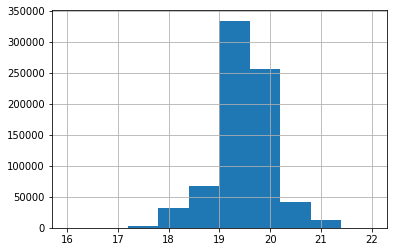

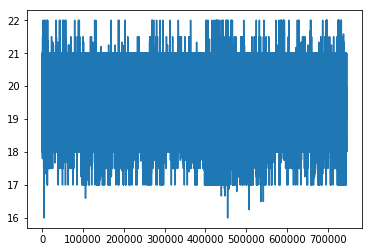

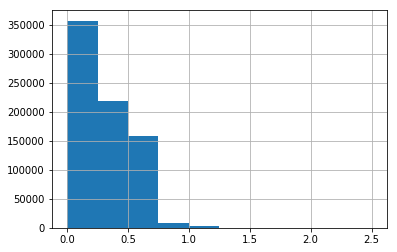

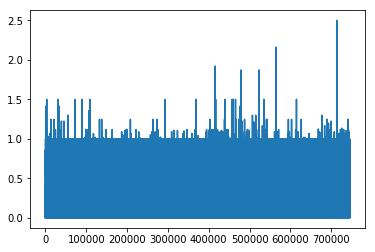

orig_fid      0
nlayers       0
SOL_ZMX       0
SOL_Z1        0
SOL_Z2        0
SOL_Z3        0
SOL_Z4        0
SOL_AWC1      0
SOL_AWC2      0
SOL_AWC3      0
SOL_AWC4      0
mean        470
median      470
std         470
geometry      0
dtype: int64

,orig_fid,nlayers,SOL_ZMX,SOL_Z1,SOL_Z2,SOL_Z3,SOL_Z4,SOL_AWC1,SOL_AWC2,SOL_AWC3,SOL_AWC4,mean,median,std,geometry
211092,210815,2,1000,400,600,0,0,0.316,0.316,0.0,0.0,19.000000,19.0,0.000000,"POLYGON ((640502.0600000024 6502358.52, 640513..."
657449,657438,1,1000,1000,0,0,0,0.500,0.000,0.0,0.0,20.000000,20.0,0.000000,"POLYGON ((632103.4600000009 6438054.98, 632100..."
532479,524748,1,1000,1000,0,0,0,0.150,0.000,0.0,0.0,19.000000,19.0,0.000000,"POLYGON ((620335.9368000031 6601656.0638, 6203..."
204082,203805,1,1000,1000,0,0,0,0.200,0.000,0.0,0.0,19.500000,19.5,0.500000,"POLYGON ((605517.6000000015 6558114.960000001,..."
713010,712612,1,1000,1000,0,0,0,0.500,0.000,0.0,0.0,18.000000,18.0,0.000000,"POLYGON ((619585.9099999964 6429698.359999999,..."
491004,502812,1,1000,1000,0,0,0,0.150,0.000,0.0,0.0,19.000000,19.0,0.707107,"POLYGON ((666101.299999997 6467294.329999998, ..."
455448,451043,1,1500,1500,0,0,0,0.150,0.000,0.0,0.0,18.200000,18.0,0.400000,"POLYGON ((555002.420599997 6444793.5757, 55500..."
264309,264304,1,1000,1000,0,0,0,0.200,0.000,0.0,0.0,19.000000,19.0,0.000000,"POLYGON ((477164.1203000024 6531119.217399999,..."
492316,504124,1,1750,1750,0,0,0,0.150,0.000,0.0,0.0,18.714286,19.0,0.699854,"POLYGON ((652601.8100000024 6574296.370000001,..."
393062,393062,2,1000,200,800,0,0,0.200,0.225,0.0,0.0,19.000000,19.0,0.000000,"POLYGON ((611285.5399999991 6585368.710000001,..."


orig_fid      int64
nlayers       int64
SOL_ZMX       int64
SOL_Z1        int64
SOL_Z2        int64
SOL_Z3        int64
SOL_Z4        int64
SOL_AWC1    float64
SOL_AWC2    float64
SOL_AWC3    float64
SOL_AWC4    float64
mean        float64
median      float64
std         float64
geometry     object
dtype: object

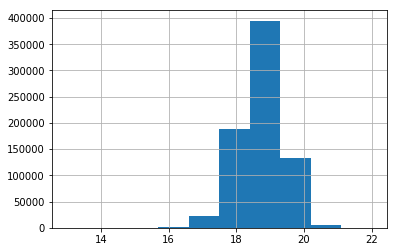

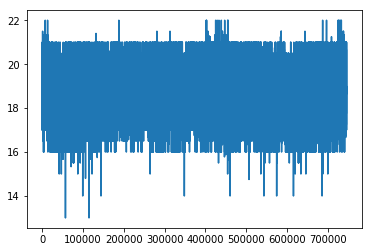

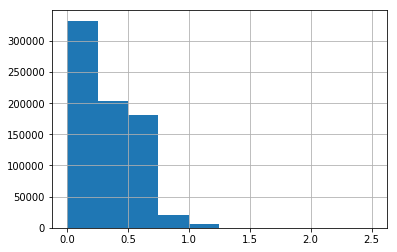

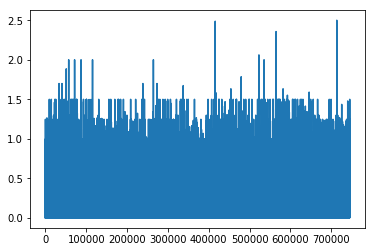

orig_fid      0
nlayers       0
SOL_ZMX       0
SOL_Z1        0
SOL_Z2        0
SOL_Z3        0
SOL_Z4        0
SOL_AWC1      0
SOL_AWC2      0
SOL_AWC3      0
SOL_AWC4      0
mean        470
median      470
std         470
geometry      0
dtype: int64

,orig_fid,nlayers,SOL_ZMX,SOL_Z1,SOL_Z2,SOL_Z3,SOL_Z4,SOL_AWC1,SOL_AWC2,SOL_AWC3,SOL_AWC4,mean,median,std,geometry
614939,614793,1,1000,1000,0,0,0,0.316,0.000,0.0,0.0,19.000000,19.0,0.000000,"POLYGON ((684339.7800000012 6388279.640000001,..."
696818,696420,1,1000,1000,0,0,0,0.500,0.000,0.0,0.0,16.600000,17.0,0.489898,"POLYGON ((641525.9299999997 6460928.739999998,..."
222699,222699,1,1000,1000,0,0,0,0.200,0.000,0.0,0.0,17.750000,18.0,0.433013,"POLYGON ((575588.2107999995 6557749.230700001,..."
365169,365162,2,1000,500,500,0,0,0.200,0.316,0.0,0.0,18.818182,19.0,0.385695,"POLYGON ((588653.0900000036 6535391.48, 588655..."
703571,703173,1,1000,1000,0,0,0,0.500,0.000,0.0,0.0,19.000000,19.0,0.000000,"POLYGON ((654959.1799999997 6438654.719999999,..."
199234,198957,1,1000,1000,0,0,0,0.150,0.000,0.0,0.0,19.000000,19.0,0.000000,"POLYGON ((474769.3599999994 6551231.41, 474701..."
261263,261254,2,1000,250,750,0,0,0.200,0.225,0.0,0.0,19.000000,19.0,0.000000,"POLYGON ((649885.75 6596810.48, 649887.0700000..."
406099,441568,1,1500,1500,0,0,0,0.150,0.000,0.0,0.0,18.000000,18.0,0.707107,"POLYGON ((620044.8500000015 6416900.809999999,..."
479492,491300,1,1000,1000,0,0,0,0.150,0.000,0.0,0.0,17.750000,18.0,0.433013,"POLYGON ((672815.3599999994 6592217.18, 672809..."
613401,613255,1,1000,1000,0,0,0,0.200,0.000,0.0,0.0,18.500000,18.5,0.500000,"POLYGON ((659315.4900000021 6450219.640000001,..."


orig_fid      int64
nlayers       int64
SOL_ZMX       int64
SOL_Z1        int64
SOL_Z2        int64
SOL_Z3        int64
SOL_Z4        int64
SOL_AWC1    float64
SOL_AWC2    float64
SOL_AWC3    float64
SOL_AWC4    float64
mean        float64
median      float64
std         float64
geometry     object
dtype: object

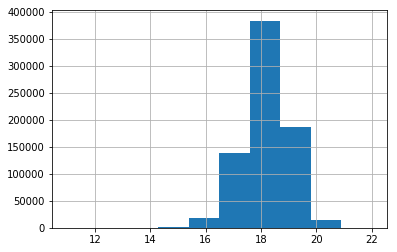

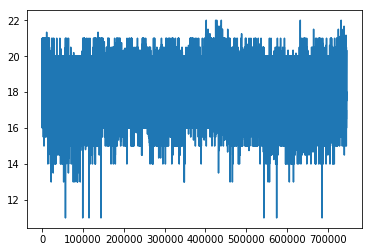

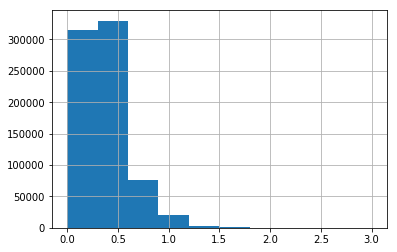

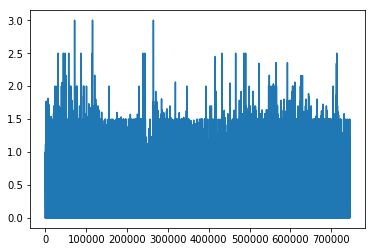

orig_fid      0
nlayers       0
SOL_ZMX       0
SOL_Z1        0
SOL_Z2        0
SOL_Z3        0
SOL_Z4        0
SOL_AWC1      0
SOL_AWC2      0
SOL_AWC3      0
SOL_AWC4      0
mean        470
median      470
std         470
geometry      0
dtype: int64

,orig_fid,nlayers,SOL_ZMX,SOL_Z1,SOL_Z2,SOL_Z3,SOL_Z4,SOL_AWC1,SOL_AWC2,SOL_AWC3,SOL_AWC4,mean,median,std,geometry
640860,640714,1,1000,1000,0,0,0,0.316,0.0,0.0,0.0,16.000000,16.0,0.000000,"POLYGON ((651559.7800000012 6408852.75, 651558..."
704712,704314,1,1000,1000,0,0,0,0.500,0.0,0.0,0.0,18.000000,18.0,0.000000,"POLYGON ((660428.1403999999 6446712.600000001,..."
333901,333900,1,1000,1000,0,0,0,0.316,0.0,0.0,0.0,18.000000,18.0,0.000000,"POLYGON ((686951.049999997 6395960.239999998, ..."
511058,465485,1,1000,1000,0,0,0,0.150,0.0,0.0,0.0,17.000000,17.0,0.000000,"POLYGON ((392680.7800000012 6459322.850000001,..."
251312,251300,1,1000,1000,0,0,0,0.316,0.0,0.0,0.0,18.000000,18.0,0.000000,"POLYGON ((490612.4600000009 6537245.550000001,..."
615020,614874,1,1000,1000,0,0,0,0.316,0.0,0.0,0.0,18.000000,18.0,1.000000,"POLYGON ((636963.2299999967 6393467.710000001,..."
270388,270383,1,1000,1000,0,0,0,0.200,0.0,0.0,0.0,18.000000,18.0,0.000000,"POLYGON ((658462.7400000021 6418059.329999998,..."
603287,603141,1,1000,1000,0,0,0,0.200,0.0,0.0,0.0,18.000000,18.0,0.000000,"POLYGON ((701783.4600000009 6407270.879999999,..."
54652,54023,1,1000,1000,0,0,0,0.200,0.0,0.0,0.0,17.833333,18.0,0.687184,"POLYGON ((613355.25 6432042.41, 613354.7999999..."
6699,6514,1,1000,1000,0,0,0,0.200,0.0,0.0,0.0,18.000000,18.0,0.000000,"POLYGON ((584267.4099999964 6527007.98, 584237..."


orig_fid      int64
nlayers       int64
SOL_ZMX       int64
SOL_Z1        int64
SOL_Z2        int64
SOL_Z3        int64
SOL_Z4        int64
SOL_AWC1    float64
SOL_AWC2    float64
SOL_AWC3    float64
SOL_AWC4    float64
mean        float64
median      float64
std         float64
geometry     object
dtype: object

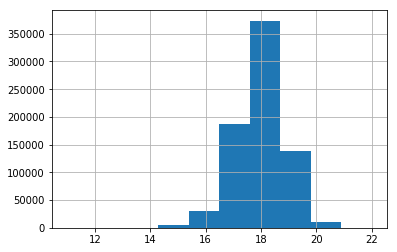

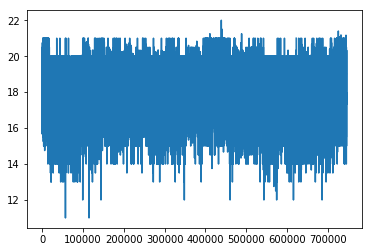

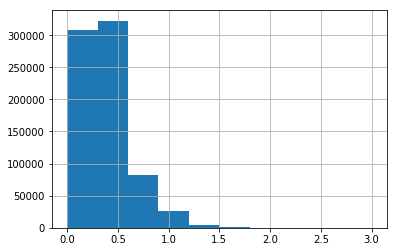

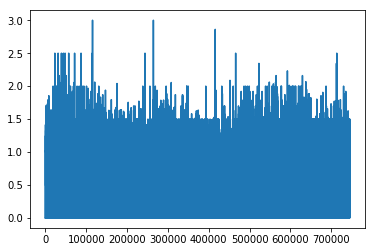

orig_fid      0
nlayers       0
SOL_ZMX       0
SOL_Z1        0
SOL_Z2        0
SOL_Z3        0
SOL_Z4        0
SOL_AWC1      0
SOL_AWC2      0
SOL_AWC3      0
SOL_AWC4      0
mean        562
median      562
std         562
geometry      0
dtype: int64

,orig_fid,nlayers,SOL_ZMX,SOL_Z1,SOL_Z2,SOL_Z3,SOL_Z4,SOL_AWC1,SOL_AWC2,SOL_AWC3,SOL_AWC4,mean,median,std,geometry
11081,11081,1,1000,1000,0,0,0,0.150,0.000,0.000,0.0,20.666667,21.0,0.471405,"POLYGON ((613131.6599999964 6475525.859999999,..."
495256,507064,1,1000,1000,0,0,0,0.150,0.000,0.000,0.0,19.000000,19.0,0.000000,"POLYGON ((553147.6400000006 6520086.960000001,..."
300149,300133,3,1000,450,300,250,0,0.200,0.000,0.316,0.0,18.083333,18.0,0.640095,"POLYGON ((672541.3599999994 6585070.440000001,..."
240610,240610,2,1000,425,575,0,0,0.200,0.200,0.000,0.0,18.666667,19.0,0.471405,"POLYGON ((444449.950000003 6484461.940000001, ..."
312101,312085,2,1000,700,300,0,0,0.200,0.200,0.000,0.0,18.000000,18.0,0.000000,"POLYGON ((607429.25 6566946.02, 607426.0799999..."
136339,136208,1,1000,1000,0,0,0,0.150,0.000,0.000,0.0,18.000000,18.0,0.000000,"POLYGON ((392958.1899999976 6471788.780000001,..."
156574,156574,2,1000,300,700,0,0,0.316,0.500,0.000,0.0,19.333333,19.0,0.471405,"POLYGON ((556547.8999999985 6552055.140000001,..."
127655,127655,1,1000,1000,0,0,0,0.316,0.000,0.000,0.0,18.666667,19.0,0.471405,"POLYGON ((639728.3200000003 6431544.899999999,..."
722856,722458,1,1000,1000,0,0,0,0.500,0.000,0.000,0.0,19.428571,19.0,0.494872,"POLYGON ((647778.1099999994 6435080.370000001,..."
284046,284041,2,1000,650,350,0,0,0.316,0.316,0.000,0.0,18.857143,19.0,0.349927,"POLYGON ((591272.7299999967 6537033.489999998,..."


orig_fid      int64
nlayers       int64
SOL_ZMX       int64
SOL_Z1        int64
SOL_Z2        int64
SOL_Z3        int64
SOL_Z4        int64
SOL_AWC1    float64
SOL_AWC2    float64
SOL_AWC3    float64
SOL_AWC4    float64
mean        float64
median      float64
std         float64
geometry     object
dtype: object

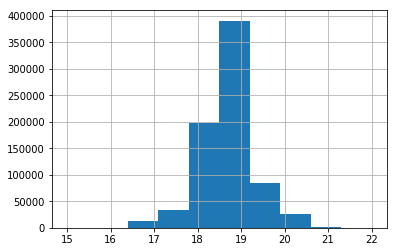

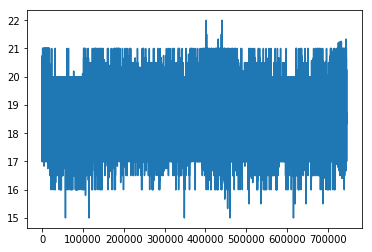

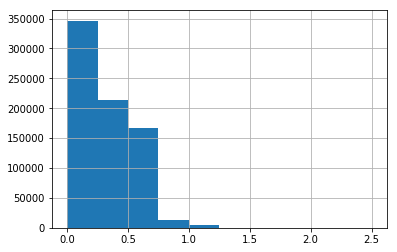

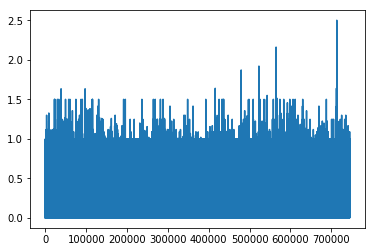

In [4]:
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

import functools
import statistics
import operator

import fiona  # type: ignore
from fiona.crs import from_epsg # type: ignore
import geopandas as gpd  # type: ignore

import rasterio
from rasterio.plot import show
from rasterstats import zonal_stats
from rasterio.warp import calculate_default_transform, reproject, Resampling

with fiona.open('eesti_soil_red1_texture_fix_geo_redo_awc_tmp.shp') as vector_src:
    
    src_crs = vector_src.crs
    display(src_crs)
    src_schema = vector_src.schema
    display(src_schema)

    src_schema['properties']["mean"] = "float"
    src_schema['properties']["median"] = "float"
    src_schema['properties']["std"] = "float"
    
    for layer in range(1,8):
        # ../hydrological/catchments/porijogi_catchment/porijõgi_catchment.shp
        # eesti_soil_red1_texture_fix_geo_redo_awc_tmp.shp
        
        outputs = zonal_stats(vector_src,
                f"C:\\dev\\05_geodata\\soil\\Estonia_EU_Hydrosoilgrids\\Estonia_250m_AWC_3301\\Estonia_250m_AWC_3301_L{layer}.tif",
                stats="mean median std",
                all_touched=True, geojson_out=True)
    
        with fiona.open(f"eesti_soil_red1_fix_geo_awc_zonal_layer_{layer}.shp", "w", driver="ESRI Shapefile", schema=src_schema, crs=src_crs) as collection:
            collection.writerecords(outputs)
            print(len(collection))
            collection.flush()


# load geodataframes
for layer in range(1,8):
    next_layer = gpd.read_file(f"eesti_soil_red1_fix_geo_awc_zonal_layer_{layer}.shp", encoding='utf-8')
    display(next_layer.isnull().sum())
    display(next_layer.sample(10))
    display(next_layer.dtypes)
    fig, ax = plt.subplots()
    fig = next_layer["mean"].hist(ax=ax)
    plt.show()
    fig, ax = plt.subplots()
    fig = next_layer["mean"].plot(ax=ax)
    plt.show()
    fig, ax = plt.subplots()
    fig = next_layer["std"].hist(ax=ax)
    plt.show()
    fig, ax = plt.subplots()
    fig = next_layer["std"].plot(ax=ax)
    plt.show()
    # next_layer["mean"] = next_layer.isnull().apply(lambda x: x["majority"])
    # display(next_layer.isnull().sum())
    # because to save memory space, the factions after comma were stored as Byte / UInt8
    # next_layer['mean'] = next_layer['mean'] / 100.0
    next_layer.to_file(f"eesti_soil_red1_fix_geo_awc_zonal_layer_{layer}.shp", encoding='utf-8')
    
# do_layer_avg_1_4

In [5]:
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

import fiona  # type: ignore
from fiona.crs import from_epsg # type: ignore
import geopandas as gpd  # type: ignore


In [7]:
layer1 = gpd.read_file("eesti_soil_red1_fix_geo_awc_zonal_layer_1.shp", encoding='utf-8')
layer1.drop(columns=['median','std'], inplace=True)
layer1.rename(columns={"mean" : "AWC_L1"}, inplace=True)

for layer in range(2,8):
    next_layer = gpd.read_file(f"eesti_soil_red1_fix_geo_awc_zonal_layer_{layer}.shp", encoding='utf-8')
    next_layer.rename(columns={"mean" : "AWC_L" + str(layer)}, inplace=True)
    next_layer.drop( columns = ["median",
                            "std",
                            "nlayers",
                            "SOL_ZMX",
                            "SOL_Z1",
                            "SOL_Z2",
                            "SOL_Z3",
                            "SOL_Z4",
                            "SOL_AWC1",
                            "SOL_AWC2",
                            "SOL_AWC3",
                            "SOL_AWC4",
                            "geometry"], inplace=True)
    
    layer1 = pd.merge(left=layer1, right=next_layer, left_on='orig_fid', right_on='orig_fid', how='left')

display(layer1.sample(10))
display(layer1.dtypes)

,orig_fid,nlayers,SOL_ZMX,SOL_Z1,SOL_Z2,SOL_Z3,SOL_Z4,SOL_AWC1,SOL_AWC2,SOL_AWC3,SOL_AWC4,AWC_L1,geometry,AWC_L2,AWC_L3,AWC_L4,AWC_L5,AWC_L6,AWC_L7
412647,399026,1,1100,1100,0,0,0,0.150,0.000,0.000,0.0,21.00,"POLYGON ((674511.6599999964 6496609.800000001,...",21.142857,19.571429,19.285714,18.285714,18.285714,18.857143
112657,112657,1,1000,1000,0,0,0,0.150,0.000,0.000,0.0,18.50,"POLYGON ((390572.299999997 6533465.039999999, ...",18.500000,18.000000,18.000000,17.500000,17.500000,17.000000
203817,203540,2,1000,400,600,0,0,0.200,0.200,0.000,0.0,20.00,"POLYGON ((438625.6199999973 6475453.84, 438625...",19.500000,19.000000,19.000000,18.500000,18.000000,18.000000
240191,240191,3,1000,220,375,405,0,0.200,0.000,0.225,0.0,19.50,"POLYGON ((401363.4200000018 6482899.550000001,...",19.333333,18.000000,17.833333,17.000000,16.833333,17.833333
482221,494029,2,1000,800,200,0,0,0.150,0.316,0.000,0.0,21.00,"POLYGON ((679115.7400000021 6483890.359999999,...",21.000000,18.500000,17.500000,16.500000,16.000000,17.500000
211058,210781,2,1000,400,600,0,0,0.316,0.316,0.000,0.0,20.00,"POLYGON ((539541.8999999985 6481191.440000001,...",19.875000,19.000000,18.125000,17.875000,17.500000,17.875000
447862,432261,1,1000,1000,0,0,0,0.150,0.000,0.000,0.0,20.20,"POLYGON ((572729.3999999985 6510946.77, 572713...",20.800000,19.600000,18.800000,18.200000,18.200000,18.800000
555144,555133,1,1000,1000,0,0,0,0.200,0.000,0.000,0.0,21.50,"POLYGON ((616158.1312000006 6420430.6281, 6161...",21.500000,20.000000,19.000000,18.500000,18.500000,19.000000
229036,229036,1,1000,1000,0,0,0,0.200,0.000,0.000,0.0,21.25,"POLYGON ((614667.8299999982 6568192.460000001,...",21.000000,20.000000,19.500000,19.000000,18.250000,19.750000
136500,136369,1,1000,1000,0,0,0,0.150,0.000,0.000,0.0,20.00,"POLYGON ((673625.6438999996 6497934.1677, 6736...",21.000000,20.000000,19.000000,18.000000,18.000000,19.000000


orig_fid      int64
nlayers       int64
SOL_ZMX       int64
SOL_Z1        int64
SOL_Z2        int64
SOL_Z3        int64
SOL_Z4        int64
SOL_AWC1    float64
SOL_AWC2    float64
SOL_AWC3    float64
SOL_AWC4    float64
AWC_L1      float64
geometry     object
AWC_L2      float64
AWC_L3      float64
AWC_L4      float64
AWC_L5      float64
AWC_L6      float64
AWC_L7      float64
dtype: object

In [30]:
display(layer1.isnull().sum())

display(layer1.loc[layer1['AWC_L7'].isnull()])

orig_fid    0
nlayers     0
SOL_ZMX     0
SOL_Z1      0
SOL_Z2      0
SOL_Z3      0
SOL_Z4      0
SOL_AWC1    0
SOL_AWC2    0
SOL_AWC3    0
SOL_AWC4    0
AWC_L1      0
geometry    0
AWC_L2      0
AWC_L3      0
AWC_L4      0
AWC_L5      0
AWC_L6      0
AWC_L7      0
dtype: int64

,orig_fid,nlayers,SOL_ZMX,SOL_Z1,SOL_Z2,SOL_Z3,SOL_Z4,SOL_AWC1,SOL_AWC2,SOL_AWC3,SOL_AWC4,AWC_L1,geometry,AWC_L2,AWC_L3,AWC_L4,AWC_L5,AWC_L6,AWC_L7


In [29]:
cache_row = {}

for idx, row in layer1.loc[layer1['AWC_L7'].isnull()].iterrows():
    
    display(f"found {idx}, take {idx-2}")
    
    layer1.loc[idx,'AWC_L1'] = layer1.loc[idx-2,'AWC_L1']
    layer1.loc[idx,'AWC_L2'] = layer1.loc[idx-2,'AWC_L2']
    layer1.loc[idx,'AWC_L3'] = layer1.loc[idx-2,'AWC_L3']
    layer1.loc[idx,'AWC_L4'] = layer1.loc[idx-2,'AWC_L4']
    layer1.loc[idx,'AWC_L5'] = layer1.loc[idx-2,'AWC_L5']
    layer1.loc[idx,'AWC_L6'] = layer1.loc[idx-2,'AWC_L6']
    layer1.loc[idx,'AWC_L7'] = layer1.loc[idx-2,'AWC_L7']
    
    display(f"found {row['AWC_L1']}, put {layer1.loc[idx,'AWC_L7']}")

'found 14527, take 14525'

'found nan, put 18.333333333333332'

'found 14528, take 14526'

'found nan, put 18.5'

'found 14564, take 14562'

'found nan, put 18.666666666666668'

'found 14594, take 14592'

'found nan, put 20.0'

'found 14595, take 14593'

'found nan, put 20.0'

'found 14596, take 14594'

'found nan, put 20.0'

'found 14597, take 14595'

'found nan, put 20.0'

'found 14598, take 14596'

'found nan, put 20.0'

'found 14599, take 14597'

'found nan, put 20.0'

'found 14600, take 14598'

'found nan, put 20.0'

'found 14685, take 14683'

'found nan, put 19.0'

'found 14688, take 14686'

'found nan, put 20.0'

'found 14689, take 14687'

'found nan, put 20.0'

'found 14712, take 14710'

'found nan, put 19.75'

'found 14748, take 14746'

'found nan, put 18.333333333333332'

'found 14753, take 14751'

'found nan, put 18.875'

'found 14758, take 14756'

'found nan, put 19.0'

'found 14808, take 14806'

'found nan, put 18.75'

'found 14884, take 14882'

'found nan, put 20.0'

'found 14903, take 14901'

'found nan, put 20.0'

'found 14939, take 14937'

'found nan, put 19.0'

'found 14954, take 14952'

'found nan, put 20.0'

'found 14988, take 14986'

'found 20.5, put 19.142857142857142'

'found 15003, take 15001'

'found 21.0, put 18.956521739130434'

'found 15029, take 15027'

'found nan, put 19.0'

'found 15030, take 15028'

'found nan, put 19.0'

'found 15033, take 15031'

'found nan, put 19.0'

'found 15055, take 15053'

'found nan, put 18.0'

'found 15102, take 15100'

'found nan, put 19.0'

'found 15103, take 15101'

'found nan, put 19.166666666666668'

'found 15126, take 15124'

'found nan, put 19.5'

'found 15130, take 15128'

'found nan, put 19.0'

'found 15152, take 15150'

'found nan, put 18.4'

'found 15157, take 15155'

'found nan, put 19.0'

'found 15273, take 15271'

'found nan, put 19.0'

'found 15325, take 15323'

'found nan, put 19.5'

'found 15348, take 15346'

'found nan, put 19.727272727272727'

'found 15352, take 15350'

'found nan, put 20.0'

'found 15363, take 15361'

'found nan, put 19.666666666666668'

'found 15364, take 15362'

'found nan, put 19.666666666666668'

'found 15397, take 15395'

'found nan, put 19.0'

'found 15398, take 15396'

'found nan, put 19.0'

'found 15399, take 15397'

'found nan, put 19.0'

'found 15433, take 15431'

'found nan, put 18.666666666666668'

'found 15434, take 15432'

'found nan, put 18.0'

'found 15435, take 15433'

'found nan, put 18.666666666666668'

'found 15508, take 15506'

'found nan, put 18.5'

'found 15590, take 15588'

'found nan, put 19.0'

'found 15619, take 15617'

'found nan, put 19.5'

'found 15631, take 15629'

'found nan, put 19.5'

'found 15736, take 15734'

'found nan, put 19.0'

'found 15745, take 15743'

'found nan, put 20.0'

'found 15763, take 15761'

'found nan, put 18.333333333333332'

'found 15907, take 15905'

'found nan, put 19.2'

'found 16133, take 16131'

'found nan, put 19.0'

'found 16134, take 16132'

'found nan, put 20.0'

'found 16135, take 16133'

'found nan, put 19.0'

'found 16136, take 16134'

'found nan, put 20.0'

'found 16137, take 16135'

'found nan, put 19.0'

'found 16138, take 16136'

'found nan, put 20.0'

'found 16174, take 16172'

'found nan, put 18.846153846153847'

'found 16183, take 16181'

'found nan, put 20.5'

'found 16184, take 16182'

'found nan, put 18.25'

'found 16185, take 16183'

'found nan, put 20.5'

'found 16186, take 16184'

'found nan, put 18.25'

'found 16243, take 16241'

'found nan, put 20.0'

'found 16244, take 16242'

'found nan, put 20.0'

'found 16325, take 16323'

'found nan, put 19.0'

'found 16326, take 16324'

'found nan, put 19.0'

'found 16327, take 16325'

'found nan, put 19.0'

'found 16336, take 16334'

'found nan, put 19.0'

'found 16372, take 16370'

'found nan, put 19.25'

'found 16427, take 16425'

'found nan, put 19.25'

'found 16428, take 16426'

'found nan, put 20.11111111111111'

'found 16457, take 16455'

'found nan, put 19.0'

'found 16477, take 16475'

'found nan, put 19.0'

'found 16478, take 16476'

'found nan, put 18.25'

'found 16479, take 16477'

'found nan, put 19.0'

'found 16507, take 16505'

'found nan, put 18.666666666666668'

'found 16541, take 16539'

'found nan, put 20.0'

'found 16542, take 16540'

'found nan, put 20.0'

'found 16543, take 16541'

'found nan, put 20.0'

'found 16544, take 16542'

'found nan, put 20.0'

'found 16545, take 16543'

'found nan, put 20.0'

'found 16546, take 16544'

'found nan, put 20.0'

'found 16547, take 16545'

'found nan, put 20.0'

'found 16660, take 16658'

'found nan, put 19.75'

'found 16670, take 16668'

'found nan, put 19.0'

'found 16677, take 16675'

'found nan, put 19.8'

'found 16699, take 16697'

'found nan, put 19.0'

'found 16700, take 16698'

'found nan, put 19.0'

'found 16726, take 16724'

'found nan, put 18.75'

'found 16727, take 16725'

'found nan, put 18.272727272727273'

'found 16843, take 16841'

'found nan, put 19.0'

'found 16853, take 16851'

'found nan, put 20.0'

'found 16907, take 16905'

'found nan, put 19.2'

'found 16986, take 16984'

'found nan, put 20.0'

'found 16987, take 16985'

'found nan, put 19.0'

'found 16988, take 16986'

'found nan, put 20.0'

'found 17027, take 17025'

'found nan, put 19.0'

'found 17028, take 17026'

'found nan, put 18.785714285714285'

'found 17029, take 17027'

'found nan, put 19.0'

'found 17030, take 17028'

'found nan, put 18.785714285714285'

'found 17122, take 17120'

'found nan, put 18.0'

'found 17123, take 17121'

'found nan, put 19.0'

'found 17127, take 17125'

'found nan, put 18.25'

'found 17128, take 17126'

'found nan, put 18.166666666666668'

'found 17286, take 17284'

'found nan, put 19.0'

'found 17289, take 17287'

'found nan, put 19.0'

'found 17424, take 17422'

'found nan, put 20.0'

'found 17503, take 17501'

'found nan, put 19.333333333333332'

'found 17504, take 17502'

'found nan, put 20.0'

'found 17581, take 17579'

'found nan, put 19.083333333333332'

'found 38670, take 38668'

'found nan, put 19.0'

'found 135384, take 135382'

'found 20.0, put 17.5'

'found 135385, take 135383'

'found 20.0, put 19.25'

'found 135386, take 135384'

'found 20.0, put 17.5'

'found 291968, take 291966'

'found nan, put 19.0'

'found 316036, take 316034'

'found nan, put 19.25'

'found 316174, take 316172'

'found nan, put 18.5'

'found 384426, take 384424'

'found nan, put 18.0'

'found 447013, take 447011'

'found 19.166666666666668, put 18.0'

'found 468269, take 468267'

'found nan, put 18.0'

'found 716844, take 716842'

'found 20.0, put 19.0'

'found 743868, take 743866'

'found nan, put 18.0'

In [26]:
layer1.loc[427,'AWC_L1']

20.25

In [32]:
import functools
import statistics
import operator

known_depths_to_layer = [  
    (0,1),
    (50,2),
    (150,3),
    (300,4),
    (600,5),
    (1000,6),
    (2000,7)
]

def get_aggregate_awc_for_depths(layer_top, layer_bottom, SOL_AWC1, awc_gradient_values, known_depths_to_layer):
    filt = list(filter(lambda x: x[0] >= layer_top and x[0] <= layer_bottom, known_depths_to_layer))
    lays = list(map(lambda x: x[1], filt))
    
    if len(lays) <= 0:
        position = statistics.mean([layer_top, layer_bottom])
        if position > known_depths_to_layer[6][0]:
            # return [7]
            lays = [7]
        elif position < known_depths_to_layer[0][0]:
            # return [1]
            lays = [1]
        else:
            diffs = []
            for i in range(1,8):
                diffs.append( (statistics.stdev([position, known_depths_to_layer[i-1][0]]), i) )
            diffs.sort(key = operator.itemgetter(0))
            lays = [ diffs[0][1] ]

    vals = statistics.mean(list(map(lambda x: awc_gradient_values[int(x)], lays)))
    return vals


def aggregate_over_depths(row):
    
    SOL_AWC1 = row['SOL_AWC1']
    SOL_AWC2 = row['SOL_AWC2']
    SOL_AWC3 = row['SOL_AWC3']
    SOL_AWC4 = row['SOL_AWC4']
    
    nlayers = row['nlayers']
    SOL_ZMX = row['SOL_ZMX']
    SOL_Z1 = row['SOL_Z1']
    SOL_Z2 = row['SOL_Z2']
    SOL_Z3 = row['SOL_Z3']
    SOL_Z4 = row['SOL_Z4']
    
    SOL_Z2_new = row['SOL_Z2']
    SOL_Z3_new = row['SOL_Z3']
    SOL_Z4_new = row['SOL_Z4']
    
    AWC_L1 = row['AWC_L1']
    AWC_L2 = row['AWC_L2']
    AWC_L3 = row['AWC_L3']
    AWC_L4 = row['AWC_L4']
    AWC_L5 = row['AWC_L5']
    AWC_L6 = row['AWC_L6']
    AWC_L7 = row['AWC_L7']
    
    awc_gradient_values_pre = np.array([AWC_L1, AWC_L2, AWC_L3, AWC_L4, AWC_L5, AWC_L5, AWC_L6, AWC_L7])
    awc_gradient_values = awc_gradient_values_pre / 100
    
    if nlayers >= 1:
        # depth from top to bottom of 1st layer is exactly SOL_Z1
        layer_top = 0
        layer_bottom = SOL_Z1
        SOL_AWC1 = get_aggregate_awc_for_depths(layer_top, layer_bottom, SOL_AWC1, awc_gradient_values, known_depths_to_layer)
    
    if nlayers >= 2:
        layer_top = SOL_Z1
        layer_bottom = SOL_Z1 + SOL_Z2
        SOL_AWC2 = get_aggregate_awc_for_depths(layer_top, layer_bottom, SOL_AWC2, awc_gradient_values, known_depths_to_layer)
        SOL_Z2_new = layer_bottom
    
    if nlayers >= 3:
        layer_top = SOL_Z1 + SOL_Z2
        layer_bottom = SOL_Z1 + SOL_Z2 + SOL_Z3
        SOL_AWC3 = get_aggregate_awc_for_depths(layer_top, layer_bottom, SOL_AWC3, awc_gradient_values, known_depths_to_layer)
        SOL_Z3_new = layer_bottom
    
    if nlayers >= 4:
        layer_top = SOL_Z1 + SOL_Z2 + SOL_Z3
        layer_bottom = SOL_Z1 + SOL_Z2 + SOL_Z3 + SOL_Z4
        SOL_AWC4 = get_aggregate_awc_for_depths(layer_top, layer_bottom, SOL_AWC4, awc_gradient_values, known_depths_to_layer)
        SOL_Z4_new = layer_bottom
    
    return pd.Series([SOL_Z1, SOL_Z2_new, SOL_Z3_new, SOL_Z4_new, SOL_AWC1, SOL_AWC2, SOL_AWC3, SOL_AWC4])

layer1[['SOL_Z1', 'SOL_Z2', 'SOL_Z3', 'SOL_Z4',
        'SOL_AWC1', 'SOL_AWC2', 'SOL_AWC3', 'SOL_AWC4']] = layer1.apply(lambda x: aggregate_over_depths(x), axis=1)

In [35]:
display(layer1.sample(10))

,orig_fid,nlayers,SOL_ZMX,SOL_Z1,SOL_Z2,SOL_Z3,SOL_Z4,SOL_AWC1,SOL_AWC2,SOL_AWC3,SOL_AWC4,AWC_L1,geometry,AWC_L2,AWC_L3,AWC_L4,AWC_L5,AWC_L6,AWC_L7
140847,140716,1,1000,1000.0,0.0,0.0,0.0,0.182500,0.0000,0.0000,0.0,20.000000,"POLYGON ((413916.8999999985 6530713.420000002,...",20.00,18.500000,18.000000,17.500000,18.00,19.000000
277475,277470,3,1000,600.0,850.0,1000.0,0.0,0.184500,0.1750,0.1725,0.0,20.750000,"POLYGON ((630168.4299999997 6585855.620000001,...",20.25,19.000000,18.000000,17.500000,17.25,18.000000
80312,72027,1,1000,1000.0,0.0,0.0,0.0,0.190833,0.0000,0.0000,0.0,21.000000,"POLYGON ((636232.3200000003 6394330.5, 636228....",20.50,19.500000,19.000000,18.500000,18.50,19.000000
79983,71698,1,1000,1000.0,0.0,0.0,0.0,0.180000,0.0000,0.0000,0.0,21.000000,"POLYGON ((659092.1700000018 6442183.629999999,...",21.00,19.500000,18.000000,16.500000,16.50,17.500000
54598,53733,1,1000,1000.0,0.0,0.0,0.0,0.188333,0.0000,0.0000,0.0,20.500000,"POLYGON ((612974.5300000012 6424946.640000001,...",20.50,19.500000,19.000000,18.000000,18.00,19.000000
631319,631173,1,1000,1000.0,0.0,0.0,0.0,0.200000,0.0000,0.0000,0.0,22.000000,"POLYGON ((687400.0300000012 6456212.300000001,...",22.00,21.000000,20.000000,19.000000,19.00,19.000000
525958,518227,1,1000,1000.0,0.0,0.0,0.0,0.185833,0.0000,0.0000,0.0,20.500000,"POLYGON ((673454.244599998 6438339.107799999, ...",20.00,19.000000,18.500000,18.000000,18.00,18.500000
266664,266659,2,1000,700.0,1000.0,0.0,0.0,0.193667,0.1850,0.0000,0.0,21.333333,"POLYGON ((596014.549999997 6504163.530000001, ...",21.00,19.833333,19.333333,18.333333,18.50,18.833333
685931,685774,2,1000,600.0,1000.0,0.0,0.0,0.182500,0.1775,0.0000,0.0,19.500000,"POLYGON ((389029.0700000003 6458870.82, 389011...",19.25,18.500000,17.500000,18.000000,17.50,17.750000
267256,267251,1,1000,1000.0,0.0,0.0,0.0,0.179583,0.0000,0.0000,0.0,20.000000,"POLYGON ((405315.3100000024 6489853.510000002,...",19.25,18.750000,18.250000,17.250000,17.00,18.250000


In [36]:
layer1.to_file(f"eesti_soil_red1_texture_fix_geo_redo_awc_merged_layers.shp", encoding='utf-8')

C:\dev\conda3\envs\geopython-environment\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [34]:

display(layer1.isnull().sum())

orig_fid    0
nlayers     0
SOL_ZMX     0
SOL_Z1      0
SOL_Z2      0
SOL_Z3      0
SOL_Z4      0
SOL_AWC1    0
SOL_AWC2    0
SOL_AWC3    0
SOL_AWC4    0
AWC_L1      0
geometry    0
AWC_L2      0
AWC_L3      0
AWC_L4      0
AWC_L5      0
AWC_L6      0
AWC_L7      0
dtype: int64